In [10]:
import torch
from torchvision.utils import make_grid, save_image
import utils.dataset_cached as dc
from utils.dataset_cached import CELEBA_EASY_LABELS, CELEBACached
from models.ccvae import CCVAE
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import PIL


# Load DataSet and Model

In [2]:
loaders = dc.setup_data_loaders(False, 1, root="./data/datasets/celeba", download=False)
im_shape = (3, 64, 64)
cc_vae = CCVAE(z_dim=45,
                   num_classes=len(CELEBA_EASY_LABELS),
                   im_shape=im_shape,
                   use_cuda=False,
                   prior_fn=loaders['test'].dataset.prior_fn)

Splitting Dataset


In [3]:
ENCODER_PATH = './data/weights_f10_80epoch/encoder.pt'
DECODER_PATH = './data/weights_f10_80epoch/decoder.pt'
COND_PRIOR_PATH = './data/weights_f10_80epoch/cond_prior.pt'
CLASSIFIER_PATH = './data/weights_f10_80epoch/classifier.pt'

In [4]:

# Load weights for the encoder
encoder_checkpoint = torch.load(ENCODER_PATH)
cc_vae.encoder.load_state_dict(encoder_checkpoint.state_dict())

# Load weights for the decoder
decoder_checkpoint = torch.load(DECODER_PATH)
cc_vae.decoder.load_state_dict(decoder_checkpoint.state_dict())

# Load weights for the classifier
classifier_checkpoint = torch.load(CLASSIFIER_PATH)
cc_vae.classifier.load_state_dict(classifier_checkpoint.state_dict())

# Load weights for the conditional prior
cond_prior_checkpoint = torch.load(COND_PRIOR_PATH)
cc_vae.cond_prior.load_state_dict(cond_prior_checkpoint.state_dict())

# Make sure to set each component to evaluation mode if needed
cc_vae.encoder.eval()
cc_vae.decoder.eval()
cc_vae.classifier.eval()
cc_vae.cond_prior.eval()

CondPrior()

## **1. Inference :**

**Reconstruct Images**

In [5]:
img_batch = CELEBACached.fixed_imgs
reconstructed_img_batch = cc_vae.reconstruct_img(img_batch).view(-1, *im_shape)

In [6]:
img_idx =25
img = img_batch[img_idx,:,:,:]
reconstructed_img = reconstructed_img_batch[img_idx,:,:,:]

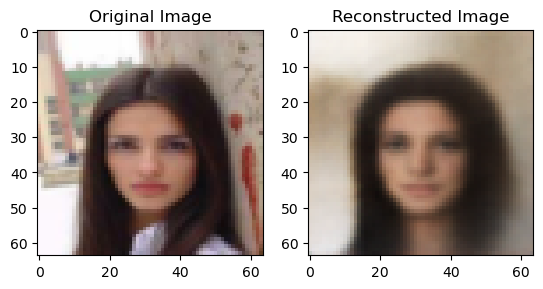

In [7]:
to_pil = transforms.ToPILImage()
image_pil = to_pil(img)
reconstructed_pil = to_pil(reconstructed_img)

# Plot the original image on the left
plt.subplot(1, 2, 1)
plt.imshow(image_pil)
plt.title('Original Image')

# Plot the reconstructed image on the right
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_pil)
plt.title('Reconstructed Image')

# Display the plots
plt.show()



**Generate Images**

## **2. PCA of Latent Space**

AttributeError: 'DataLoader' object has no attribute 'image'

## **3. Latent Walk:** : 

In [16]:
transform = transforms.Compose([
                                transforms.Resize((64, 64)),
                                transforms.ToTensor()
                            ])

temp = []
for i, f in enumerate(loaders['test'].dataset.data[:5]):
    temp.append(transform(PIL.Image.open( "data/datasets/celeba/celeba/img_align_celeba/"+f)))
fixed_test_imgs = torch.stack(temp, dim=0)
img_idx =1

img = img_batch[img_idx,:,:,:]
reconstructed_img = cc_vae.reconstruct_img(img).view(-1, *im_shape)


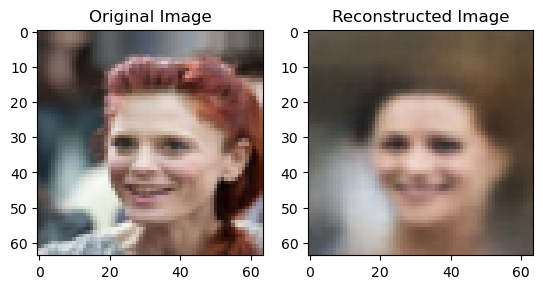

In [17]:
to_pil = transforms.ToPILImage()
image_pil = to_pil(img)
reconstructed_pil = to_pil(reconstructed_img[0,:,:,:])

# Plot the original image on the left
plt.subplot(1, 2, 1)
plt.imshow(image_pil)
plt.title('Original Image')

# Plot the reconstructed image on the right
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_pil)
plt.title('Reconstructed Image')

# Display the plots
plt.show()


In [18]:

cc_vae.latent_walk(img, './data/images_mc')